In [1]:
pip install kaggle --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 996.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.2-py3-none-any.whl size=111909 sha256=68afa319a0ef365b0b7495bb8fbb8be9a5511c1850e461d3eda6cf9de3baed8e
  Stored in directory: /root/.cache/pip/wheels/a4/75/8c/257931ed51ad92deed9b0b16a7fde62de102fa3e5e68542cdc
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [3]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download kylegraupe/wind-turbine-image-dataset-for-computer-vision

 99% 609M/617M [00:10<00:00, 115MB/s] 
100% 617M/617M [00:10<00:00, 62.6MB/s]


In [5]:
!unzip wind-turbine-image-dataset-for-computer-vision.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: train/images/windmill38_jpg.rf.18ca44b93a71069515473052727878fd.jpg  
  inflating: train/images/windmill38_jpg.rf.2177f1a5c403ad423103042546fd177f.jpg  
  inflating: train/images/windmill38_jpg.rf.2b1a4bbcd4fd8c7ef63a0b0704b9894f.jpg  
  inflating: train/images/windmill38_jpg.rf.2df1c417aba8fc4efae6bee731484943.jpg  
  inflating: train/images/windmill38_jpg.rf.57a70129e462bceb5096604fb4fb0cac.jpg  
  inflating: train/images/windmill38_jpg.rf.59bf2c49243c836a211d2ce80f55fb40.jpg  
  inflating: train/images/windmill38_jpg.rf.75cb92200f5a421938230203103d8739.jpg  
  inflating: train/images/windmill38_jpg.rf.82e54312624825140e91e44193899bc9.jpg  
  inflating: train/images/windmill38_jpg.rf.8f8f9214864bb6ff4fa2494790875ce4.jpg  
  inflating: train/images/windmill38_jpg.rf.91befc3de7166174d26dc0b78f66e4e9.jpg  
  inflating: train/images/windmill38_jpg.rf.91ebdee917c879774b3e647508796bfb.jpg  
  inflati

<h1 style="font-family:verdana;"> <center>💨Détection d'objets sur les éoliennes à l'aide de YOLOv8</center> </h1>


***

<center><img src='https://media1.giphy.com/media/1isbS8fpr9hmO5EIu0/giphy.gif?cid=ecf05e47hvrjbnyz9lmn7v1qoxw9aoj0o2xuyh0eem71q5pm&rid=giphy.gif&ct=s' height=150px width=600px></center>



# 🔬Overview

<div style="background-color:#d4f1f4; padding: 20px;">
<h2>Problem</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Les éoliennes sont essentielles à la production d'énergie renouvelable, mais leur entretien et leur surveillance constituent un défi, en particulier pour les parcs éoliens à grande échelle. L'inspection manuelle traditionnelle prend du temps, est coûteuse et peut être dangereuse. En revanche, les véhicules aériens sans pilote (UAV) offrent une alternative rentable et sûre pour l'inspection des éoliennes. Cependant, l'analyse des données collectées par les drones peut prendre du temps et nécessite des professionnels qualifiés. Une solution possible consiste à utiliser la détection d'objets pour automatiser le processus d'analyse et identifier les défauts des éoliennes.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Malgré les avantages potentiels de l'utilisation des drones pour l'inspection des éoliennes, le processus d'inspection actuel peut être inefficace et prendre beaucoup de temps. L'analyse manuelle des données recueillies par les drones par des professionnels qualifiés peut constituer un goulot d'étranglement dans le processus d'inspection. En outre, l'inspection manuelle peut s'avérer dangereuse et coûteuse, en particulier dans des conditions météorologiques difficiles ou sur un terrain accidenté. Le processus d'inspection traditionnel a également une couverture limitée et peut manquer des défauts qui ne sont pas visibles depuis le sol. Ces difficultés peuvent entraîner une réduction de la production d'énergie et une augmentation des coûts de maintenance.</p>

<h2>Solution</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">La détection d'objets peut automatiser le processus d'inspection des éoliennes et fournir une solution rentable et sûre pour la surveillance et l'entretien des parcs éoliens. En analysant les données recueillies par les drones, les algorithmes de détection d'objets peuvent identifier les défauts des éoliennes, tels que les fissures, la corrosion et d'autres types de dommages. Cela permet de détecter et de diagnostiquer les problèmes avant qu'ils ne s'aggravent et d'améliorer l'efficacité de la maintenance des éoliennes. En outre, la détection d'objets peut couvrir une large zone et fournir une vue d'ensemble du parc éolien. Cette technologie peut améliorer la sécurité et la fiabilité des éoliennes et promouvoir l'adoption des énergies renouvelables..</p>
</div>


# 🏗️Import Bibliothèques nécessaires
---

In [6]:
# Pip install method (recommended)
%pip install ultralytics
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.2/699.2 kB 3.6 MB/s eta 0:00:00


In [8]:
!pip install squarify

In [9]:

from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns
import torch

sns.set_style('darkgrid')

%matplotlib inline

# 🗂️Dataset Vue d'ensemble
---

## Visualisation des images d'un échantillon avec les annotations correspondantes

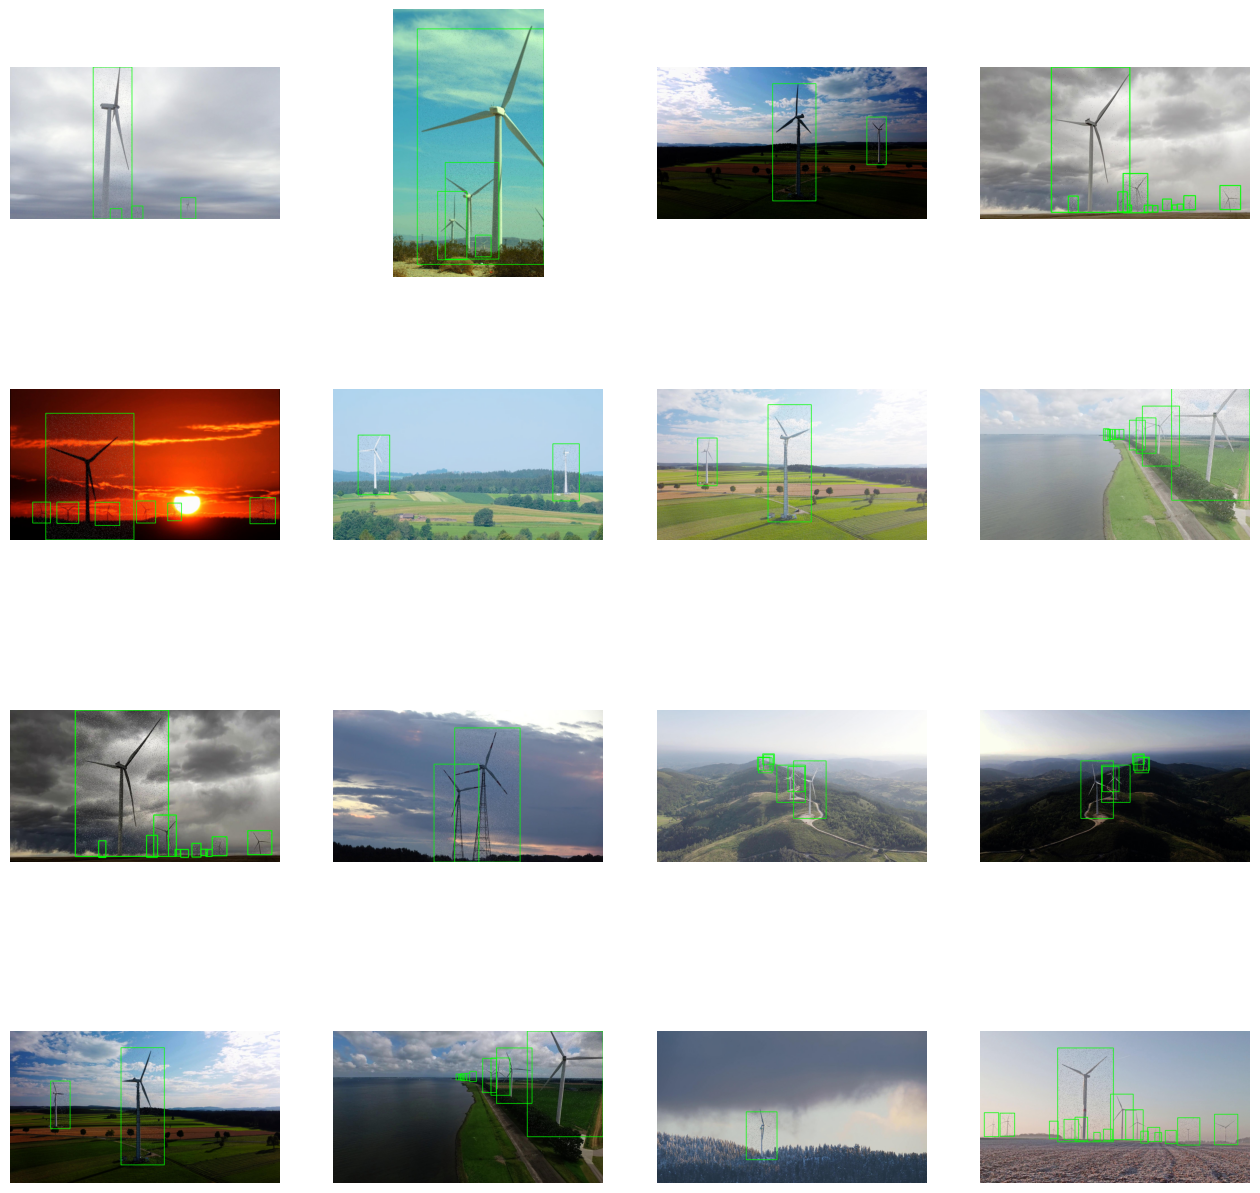

In [10]:
# Définir les chemins d'accès aux répertoires des images et des étiquettes
train_images = "train/images"
train_labels = "train/labels"

test_images = "test/images"
test_labels = "test/labels"

val_images = "valid/images"
val_labels = "valid/labels"

# Obtenir une liste de tous les fichiers d'images dans le répertoire des images d'entraînement
image_files = os.listdir(train_images)

# Choisir 16 fichiers images aléatoires dans la liste
random_images = random.sample(image_files, 16)

# Configurer le graphe
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Boucle sur les images aléatoires et trace les détections d'objets
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # Charger l'image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Chargement des étiquettes pour cette image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Boucle sur les étiquettes et trace les détections d'objets

    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Afficher l'image avec les détections d'objets
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

## Métadonnées de l'image

In [12]:
# Load an image using OpenCV
image = cv2.imread("train/images/cabletower14_jpg.rf.301f6a757f61ee7377a97bddf6473aa0.jpg")

# Obtenir la taille de l'image
height, width, channels = image.shape
print(f"L'image a des dimensions {width}x{height} et {channels} canaux.")

L'image a des dimensions 1920x1080 et 3 canaux.


# 🚀Model Training
---

In [14]:
# Chargement d'un modèle pré-entraîné
model = YOLO('yolov8n.pt')

# libérer la mémoire du GPU
torch.cuda.empty_cache()
# Formation du modèle
model.train(data = 'data.yaml',
            epochs = 5,
            imgsz = (height, width, channels),
            seed = 42,
            batch = 1,
            workers = 4)

Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=5, time=None, patience=50, batch=1, imgsz=(1080, 1920, 3), save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

100%|██████████| 755k/755k [00:00<00:00, 17.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/train/labels... 2643 images, 15 backgrounds, 0 corrupt: 100%|██████████| 2643/2643 [00:01<00:00, 2060.31it/s]


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/valid/labels... 247 images, 1 backgrounds, 0 corrupt: 100%|██████████| 247/247 [00:00<00:00, 1470.91it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5       2.1G      1.256      3.348      1.378          5       1920: 100%|██████████| 2643/2643 [09:45<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 124/124 [00:14<00:00,  8.73it/s]

                   all        247       1562      0.719      0.213      0.193     0.0594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      1.42G       1.01      1.421      1.187         17       1920: 100%|██████████| 2643/2643 [08:37<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 124/124 [00:11<00:00, 10.97it/s]

                   all        247       1562      0.783      0.228      0.235     0.0903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      1.42G     0.9092      1.011      1.099          4       1920: 100%|██████████| 2643/2643 [08:21<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 124/124 [00:11<00:00, 10.99it/s]

                   all        247       1562      0.366      0.233      0.202     0.0717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      1.42G     0.8302     0.8275      1.046          3       1920: 100%|██████████| 2643/2643 [08:31<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 124/124 [00:12<00:00, 10.11it/s]

                   all        247       1562      0.352      0.391      0.352      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      1.44G     0.8135      0.758      1.015         12       1920: 100%|██████████| 2643/2643 [08:42<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 124/124 [00:11<00:00, 11.05it/s]

                   all        247       1562      0.606      0.439       0.47      0.201



5 epochs completed in 0.751 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 124/124 [00:11<00:00, 10.97it/s]


                   all        247       1562      0.604      0.432      0.471        0.2
           cable tower        247         24      0.557      0.263      0.292      0.117
               turbine        247       1538       0.65        0.6      0.651      0.284
Speed: 1.7ms preprocess, 19.2ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d13c0ea3700>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

<div style="background-color:#f2f2f2 ; padding : 20px ;">
<h2>mAP Metrics</h2>
<p style="font-size:20px ; font-family:verdana ; line-height : 1.7em ;">La précision moyenne moyenne (mAP) est une mesure d'évaluation populaire dans la détection d'objets, y compris le modèle YOLO. Elle est utilisée pour évaluer la précision d'un modèle de détection d'objets en mesurant sa capacité à détecter des objets dans une image, ainsi que la précision de ces détections. La mAP prend en compte à la fois le nombre d'objets correctement identifiés et la qualité des détections, ce qui signifie qu'il s'agit d'une mesure robuste pour évaluer les performances d'un modèle de détection d'objets.</p> <p style="text-align : justify ;">Précision moyenne (mAP)

</p> <p style="font-size:20px ; font-family:verdana ; line-height : 1.7em ;">Dans YOLO, mAP est particulièrement important car il mesure la précision du modèle dans la détection des objets d'intérêt. Plus le mAP est élevé, plus le modèle est performant dans l'identification d'objets dans une image. YOLO étant un modèle de détection d'objets conçu pour des applications en temps réel, il est essentiel d'obtenir des scores mAP élevés pour s'assurer que le modèle peut détecter des objets avec précision dans des scénarios réels. Un score mAP élevé indique que le modèle peut identifier efficacement des objets et peut être utilisé en toute confiance dans des applications réelles.</p> <p style="font-size" class="font-size" style="text-align : justify ;")



<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">Il convient toutefois de noter que la mAP n'est pas une mesure parfaite et qu'elle a ses limites. Par exemple, elle ne tient pas compte de la difficulté à détecter certains types d'objets ou de l'importance des différentes classes d'objets. Néanmoins, elle reste une mesure largement utilisée et précieuse pour évaluer les modèles de détection d'objets tels que YOLO. Grâce à sa capacité à fournir une évaluation fiable de la capacité d'un modèle à détecter des objets, mAP est un outil essentiel pour les chercheurs et les praticiens dans le domaine de la vision par ordinateur..</p>
</div>

In [18]:
%matplotlib inline
# Chargement du modèle le plus performant
model = YOLO('runs/detect/train2/weights/best.pt')

# Évaluer le modèle sur l'ensemble de données de test
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/test/labels... 130 images, 2 backgrounds, 0 corrupt: 100%|██████████| 130/130 [00:00<00:00, 1795.23it/s]

val: New cache created: /content/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:17<00:00,  1.90s/it]


                   all        130        752      0.715      0.406       0.56      0.277
           cable tower        130         26      0.717      0.269      0.467      0.246
               turbine        130        726      0.713      0.544      0.653      0.309
Speed: 10.3ms preprocess, 42.4ms inference, 0.0ms loss, 15.7ms postprocess per image
Results saved to runs/detect/val


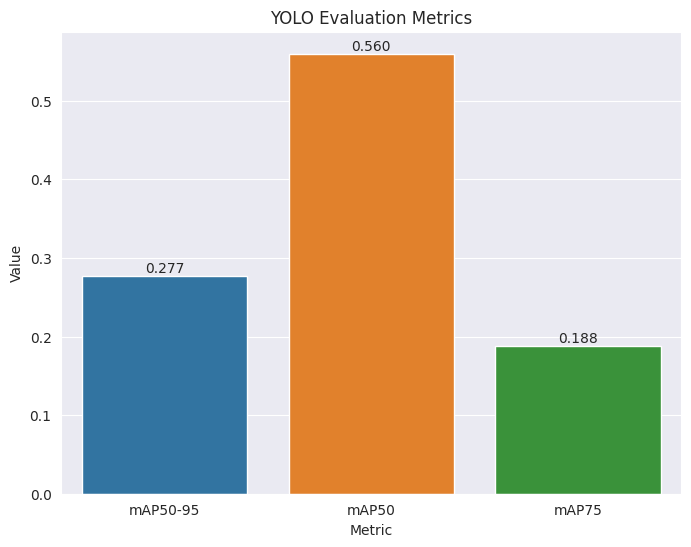

In [19]:
%matplotlib inline
# Créer le diagramme à barres
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Définir le titre et les étiquettes des axes
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Définir la taille de la figure
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Ajouter les valeurs au sommet des barres
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Afficher le tracé
plt.show()

# 🔮Faire des prédictions sur des images test
---

In [37]:
img_path='test/images/windmill30_jpg.rf.eff3aa788740793418dd389ce6e68f21.jpg'

# Lire l'image
img = cv2.imread(img_path)
# Obtenir des prévisions
y_hat = model.predict(img, conf = 0.25, device = 0, verbose = False)

# Obtenir les boîtes de délimitation, la confiance et les classes des objets reconnus dans l'image actuelle.
boxes   = y_hat[0].boxes.xyxy.cpu().numpy()
conf    = y_hat[0].boxes.conf.cpu().numpy()
classes = y_hat[0].boxes.cls.cpu().numpy()

In [40]:
boxes

array([[     568.31,      584.06,       639.4,       685.4],
       [     345.22,      649.97,      368.86,      680.49],
       [     255.18,       598.5,      318.28,         681],
       [     556.63,      645.57,      583.61,      681.08],
       [     367.96,      621.74,      416.59,      681.62],
       [     467.22,      646.67,       497.3,      682.63],
       [     437.18,      647.27,      461.61,      682.05],
       [     488.25,      489.57,       605.8,      684.24],
       [     52.703,      558.01,      143.71,      680.07],
       [     318.51,      637.31,      345.09,      681.94],
       [     614.08,      98.038,      890.48,       643.5]], dtype=float32)

In [38]:
detect_img = y_hat [0].plot()

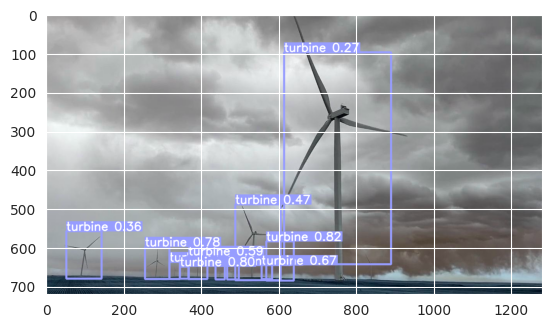

In [39]:
plt.imshow(detect_img)

In [21]:

def ship_detect(img_path):

    # Lire l'image
    img = cv2.imread(img_path)

    # Passez l'image dans le modèle de détection et obtenez le résultat.
    detect_result = model(img)

    # Tracer les détections
    detect_img = detect_result[0].plot()

    # Convertir l'image au format RVB
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


0: 1088x1920 7 turbines, 102.1ms
Speed: 8.4ms preprocess, 102.1ms inference, 2.3ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 (no detections), 25.5ms
Speed: 11.8ms preprocess, 25.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 2 turbines, 24.9ms
Speed: 12.0ms preprocess, 24.9ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 (no detections), 25.1ms
Speed: 9.4ms preprocess, 25.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 1 turbine, 25.0ms
Speed: 10.2ms preprocess, 25.0ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 2 turbines, 24.9ms
Speed: 10.9ms preprocess, 24.9ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1920x1088 4 turbines, 59.5ms
Speed: 8.4ms preprocess, 59.5ms inference, 1.4ms postprocess per image at shape (1, 3, 1920, 1088)

0: 1920x1440 6 cable towers, 71.4ms
Speed: 20.1ms preprocess

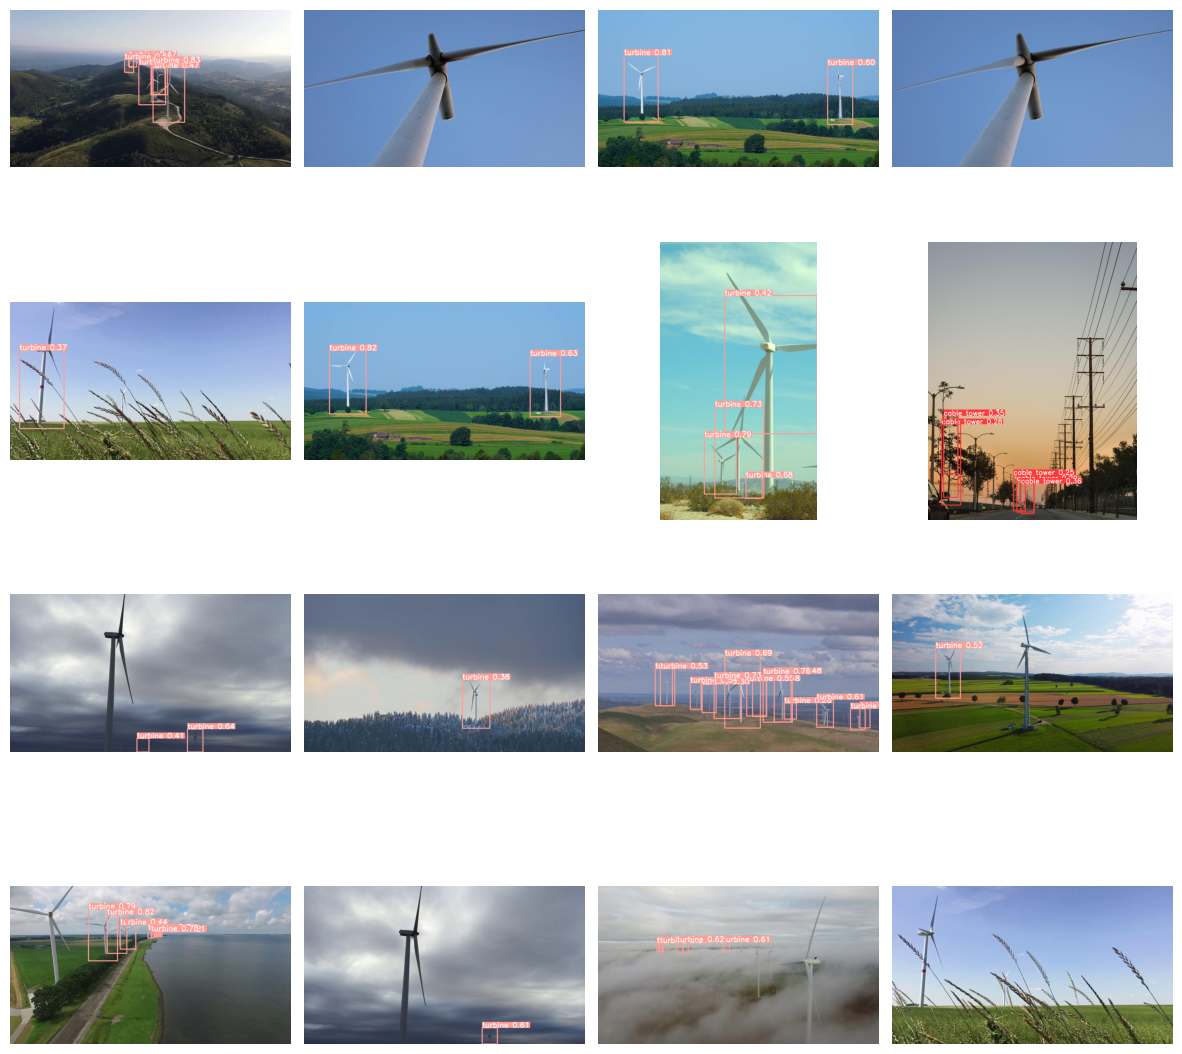

In [22]:
import random

# Définir le répertoire dans lequel les images personnalisées sont stockées
custom_image_dir = 'test/images'

# Obtenir la liste des fichiers images dans le répertoire
image_files = os.listdir(custom_image_dir)

# Sélectionner 16 images aléatoires dans la liste
selected_images = random.sample(image_files, 16)

# Créer une figure avec des sous-graphes pour chaque image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Itérer sur les images sélectionnées et tracer chacune d'entre elles
for i, img_file in enumerate(selected_images):

    # Calculer l'index des lignes et des colonnes du sous-graphe actuel
    row_idx = i // 4
    col_idx = i % 4

    # Chargement de l'image actuelle et détection des objets
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)

    # Tracer l'image courante sur le sous-graphe approprié
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Ajuster l'espacement entre les sous parcelles
plt.subplots_adjust(wspace=0.05, hspace=0.05)


In [30]:
y_hat[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'cable tower', 1: 'turbine'}
obb: None
orig_img: array([[[229, 179, 161],
        [229, 179, 161],
        [229, 179, 161],
        ...,
        [203, 146, 124],
        [203, 146, 124],
        [203, 146, 124]],

       [[229, 179, 161],
        [229, 179, 161],
        [229, 179, 161],
        ...,
        [204, 147, 125],
        [203, 146, 124],
        [203, 146, 124]],

       [[229, 179, 161],
        [229, 179, 161],
        [229, 179, 161],
        ...,
        [204, 147, 125],
        [204, 147, 125],
        [203, 146, 124]],

       ...,

       [[153, 177, 177],
        [137, 161, 161],
        [112, 136, 136],
        ...,
        [ 53, 115, 103],
        [ 48, 110,  98],
        [ 37,  99,  87]],

       [[142, 166, 166],
        [135, 159, 159],
        [123, 147, 147],
        ...,
        [ 63, 125, 113],
        [ 56, 118, 